In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import  Pipeline
import warnings


Removing warnings

In [2]:
warnings.filterwarnings("ignore")

Reading in the dataset using pandas

In [3]:
df=pd.read_csv("File_mobile_prices_2023.csv")
df.head(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


Checking for the dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Checking for the null or na values 

In [5]:
df.isna().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

Checking for the percentage of null value to a dataset

In [6]:
df.isnull().sum()/df.shape[0]*100

Phone Name            0.000000
Rating ?/5            0.000000
Number of Ratings     0.000000
RAM                   0.000000
ROM/Storage           9.477124
Back/Rare Camera      0.490196
Front Camera         21.840959
Battery               0.544662
Processor             2.995643
Price in INR          0.000000
Date of Scraping      0.000000
dtype: float64

### I filled the Null value with the mode and mean

In [7]:
categorical_df=df.select_dtypes(include=["object","category"])
for x in categorical_df:
    df[x].fillna(df[x].mode()[0],inplace=True)
    print(df.isnull().sum())

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64
Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64
Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64
Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage            0
Back/Rare C

In [8]:
numerical_df=df.select_dtypes(include=["int64","float64"])
for x in numerical_df:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [9]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


Checking for the duplicated values in the dataset

In [10]:
df.duplicated().sum()

69

Dropping the duplicate values

In [11]:
df.drop_duplicates(inplace=True)

Recheck if the duplicate value was dropped successfully

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


## Removing marks and punctuation from the colymns in the Dataset

In [14]:
df["Phone Name"]=df["Phone Name"].str.replace(",","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB),4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB),4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB),4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB),4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,POCO C51 (Power Black 64 GB),4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [15]:
df["Number of Ratings"]=df["Number of Ratings"].str.replace("(","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB),4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB),4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB),4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB),4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,POCO C51 (Power Black 64 GB),4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [16]:
df["Phone Name"]=df["Phone Name"].str.replace(")","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,POCO C51 (Power Black 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [17]:
df["Phone Name"]=df["Phone Name"].str.replace(")","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,POCO C51 (Power Black 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [18]:
df["Processor"]=df["Processor"].str.replace(",","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,POCO C51 (Power Black 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [19]:
df["Price in INR"]=df["Price in INR"].str.replace("₹","")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"11,999",2023-06-17
2,POCO C51 (Royal Blue 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"6,999",2023-06-17
3,POCO C55 (Cool Blue 64 GB,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"7,749",2023-06-17
4,POCO C51 (Power Black 64 GB,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"6,999",2023-06-17


In [20]:
df["Price in INR"]=df["Price in INR"].str.replace(",","")

### Changing Categorical values in a dataset to Numerical values

In [21]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,427,16,14,171,26,78,187,407,0
1,789,4.2,642,25,20,118,32,78,173,45,0
2,748,4.3,186,25,20,172,26,78,106,441,0
3,750,4.2,309,25,20,137,26,78,193,459,0
4,747,4.3,186,25,20,172,26,78,106,441,0


## Dataset Analysis

In [22]:
df1=df.describe()
df1

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.0
mean,777.946237,4.212281,349.226938,26.264290,10.937182,92.587436,17.957555,67.748727,164.869836,245.051500,0.0
std,426.587490,0.534338,209.114863,9.080849,6.362583,50.031622,8.848985,22.317239,95.144404,156.257309,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,424.500000,4.200000,162.000000,20.000000,5.000000,43.000000,12.000000,58.000000,69.500000,106.000000,0.0
50%,778.000000,4.300000,354.000000,26.000000,8.000000,97.000000,12.000000,78.000000,174.000000,222.000000,0.0
75%,1147.500000,4.400000,526.500000,36.000000,17.000000,138.000000,26.000000,78.000000,250.000000,388.000000,0.0
max,1506.000000,4.800000,716.000000,45.000000,26.000000,173.000000,32.000000,101.000000,331.000000,518.000000,0.0


In [23]:
df1.to_csv("Analysis.csv", index=False)

## Checking for the distribution of the Dataset

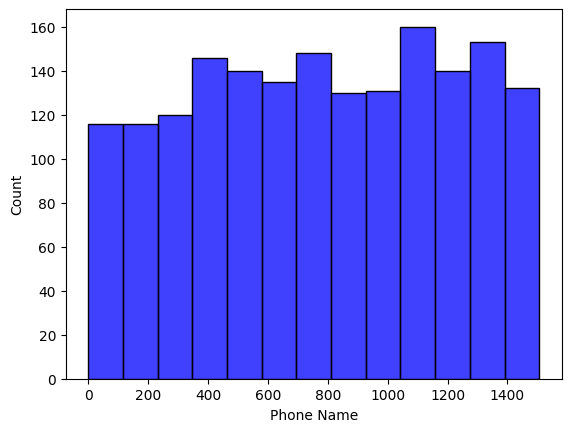

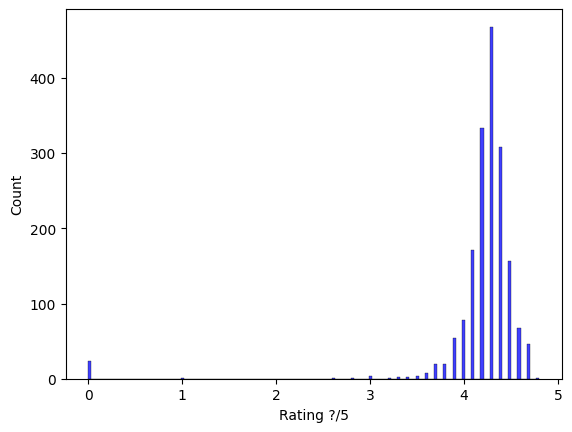

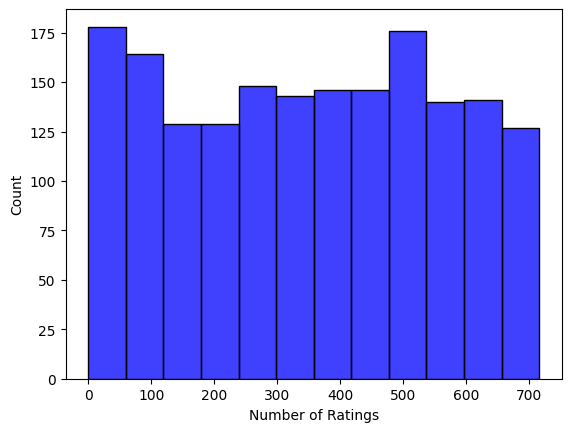

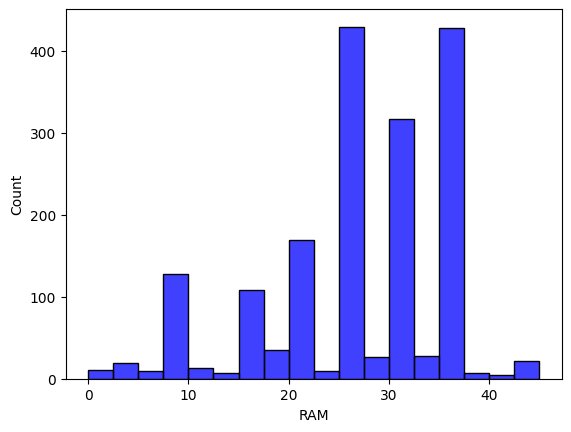

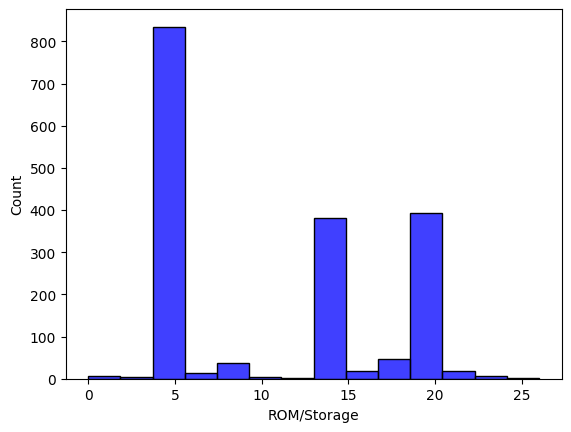

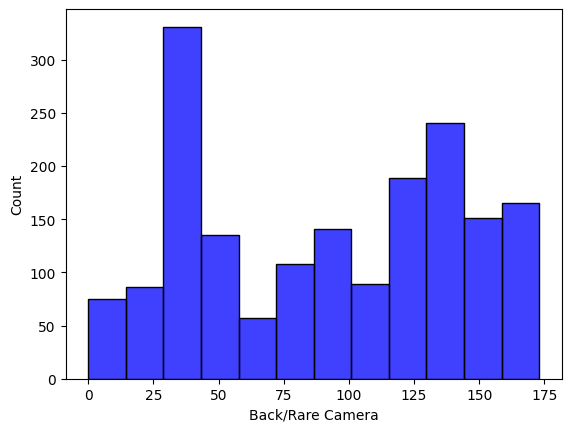

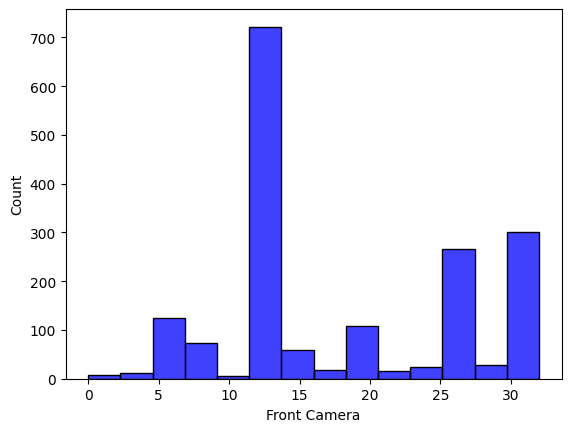

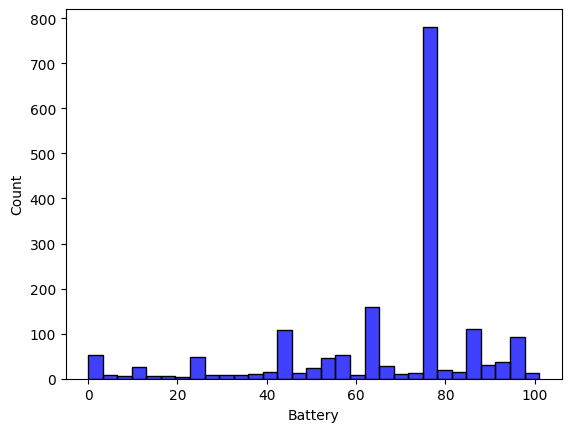

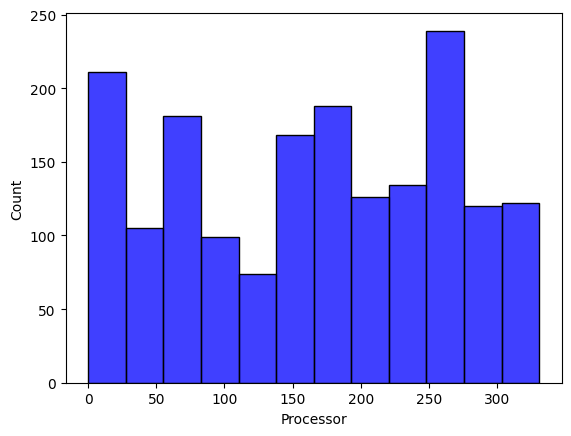

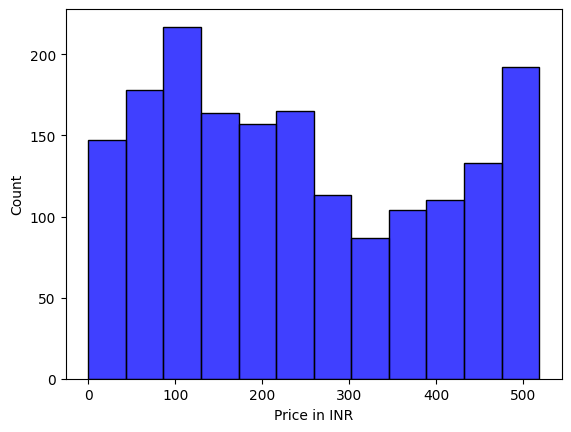

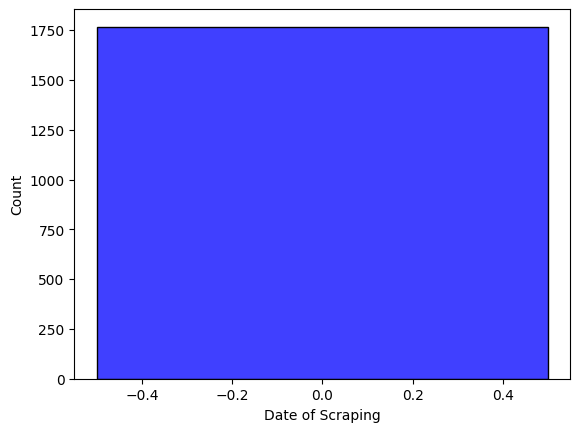

In [24]:
distribution=df.select_dtypes(include=["object","int","float"]).columns
for i in distribution:
    sns.histplot(data=df,x=i,color="blue")
    plt.show()

### * Checking for the outliers in a Dataset

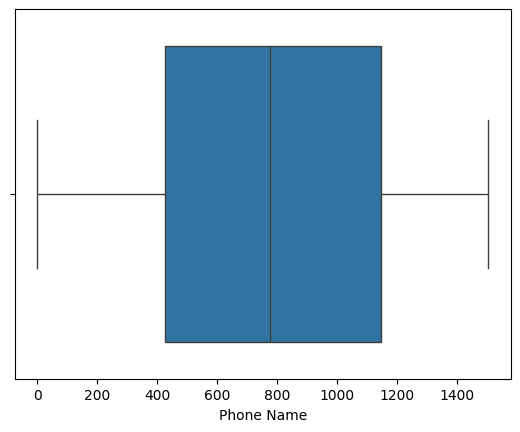

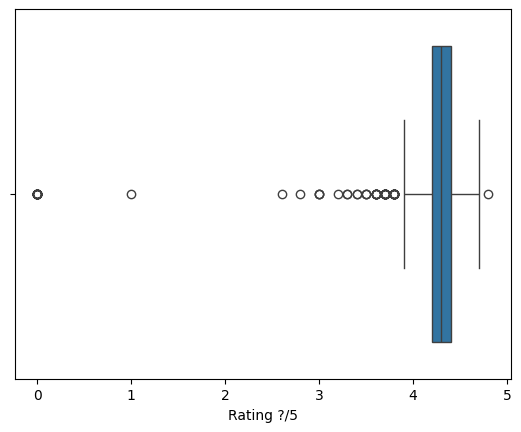

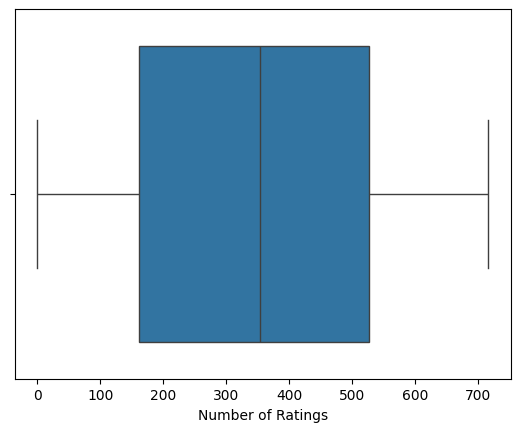

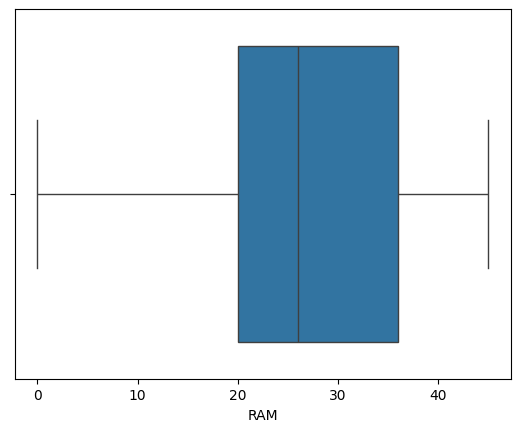

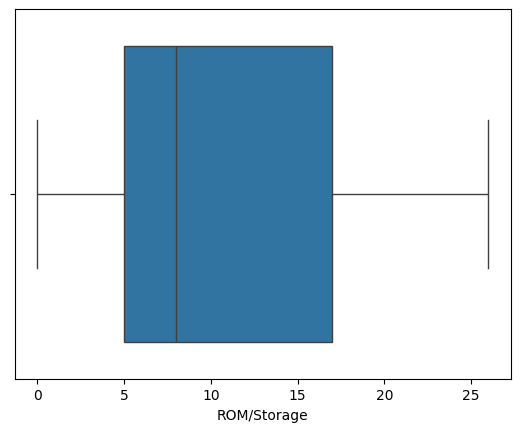

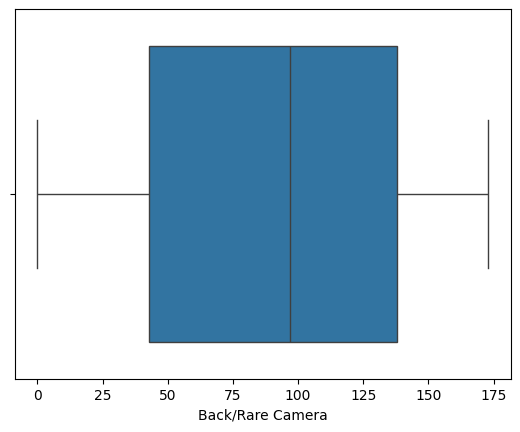

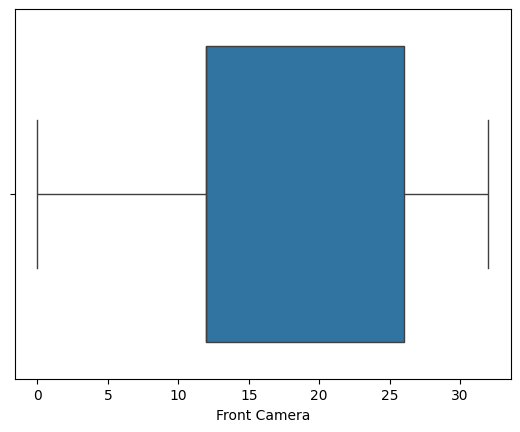

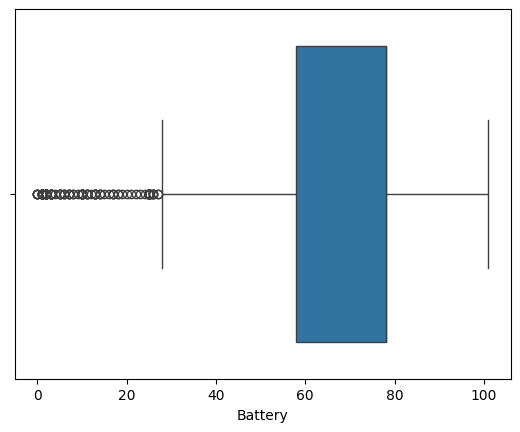

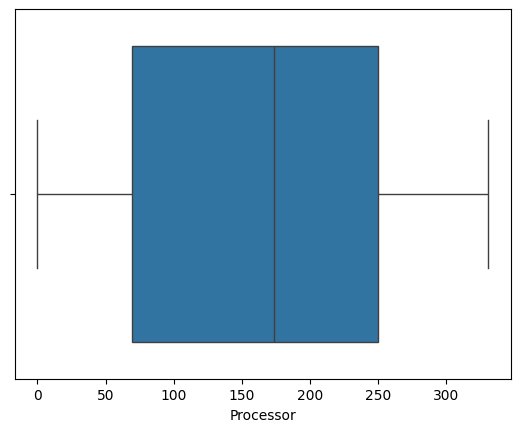

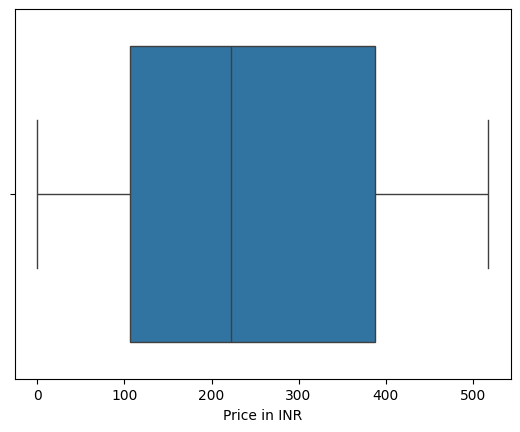

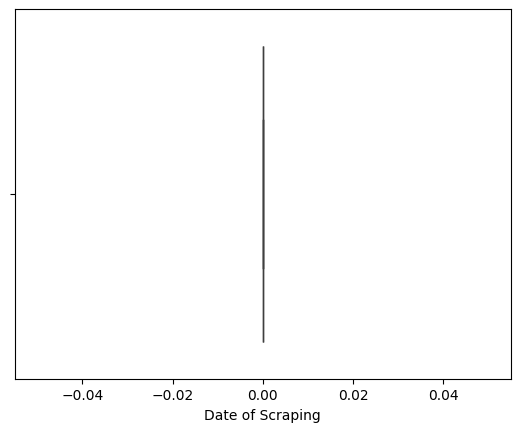

In [25]:
outliers=df.select_dtypes(include=["object","int","float"]).columns
for d in outliers:
    sns.boxplot(data=df,x=d)
    plt.show()

#### * Treating the columns with outliers in a dataset

In [26]:
def rating(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [27]:
rating(df["Rating ?/5"])

(3.9, 4.700000000000001)

In [28]:
Rating=["Rating ?/5"]
for i in Rating:
    lw,uw=rating(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [29]:
def battery(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [30]:
battery(df["Battery"])

(28.0, 108.0)

In [31]:
Batteries=["Battery"]
for i in Batteries:
    lw,uw=rating(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

* Rechecking for the outliers after outlier treatment

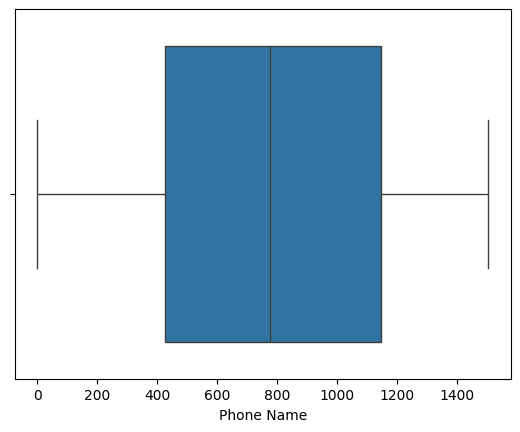

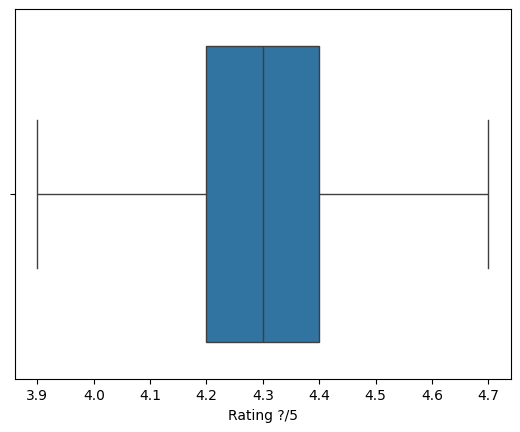

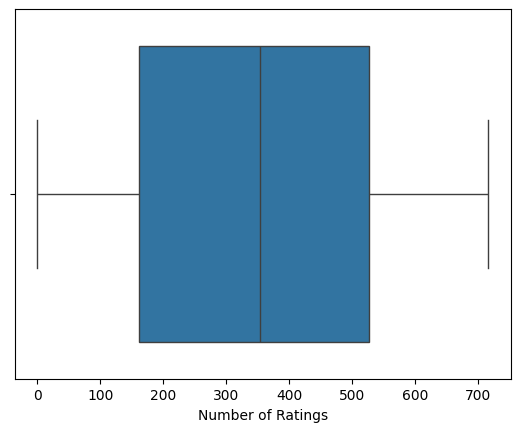

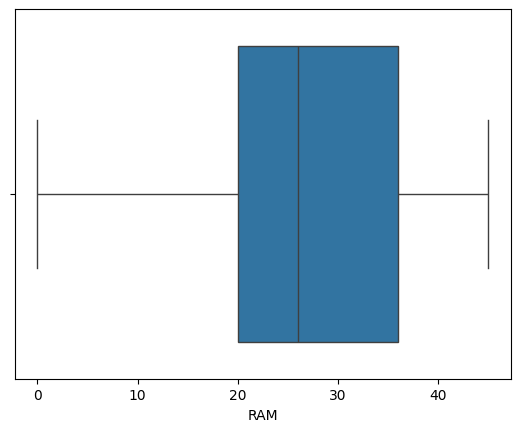

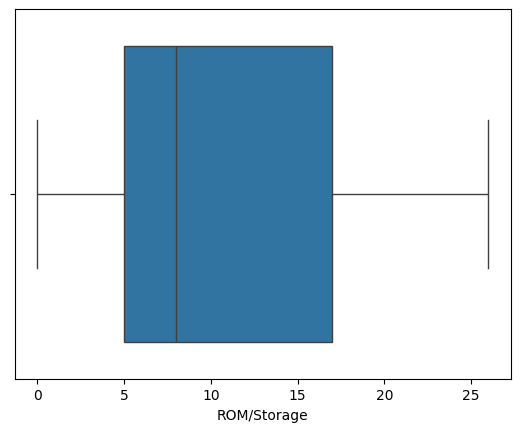

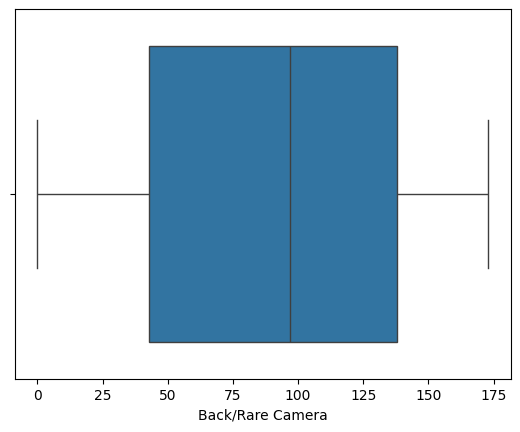

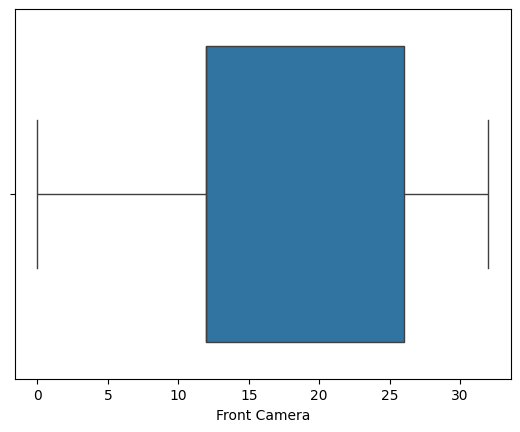

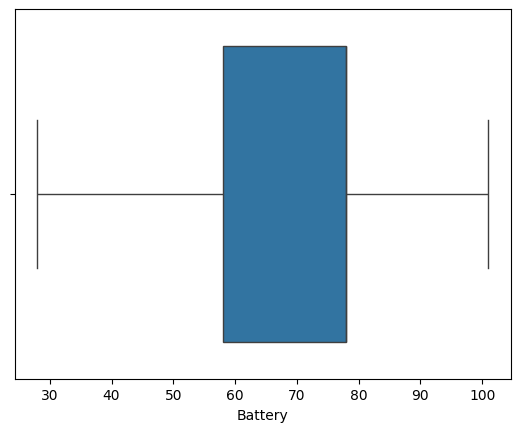

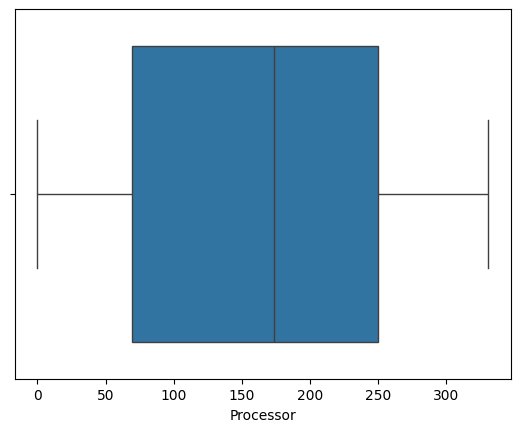

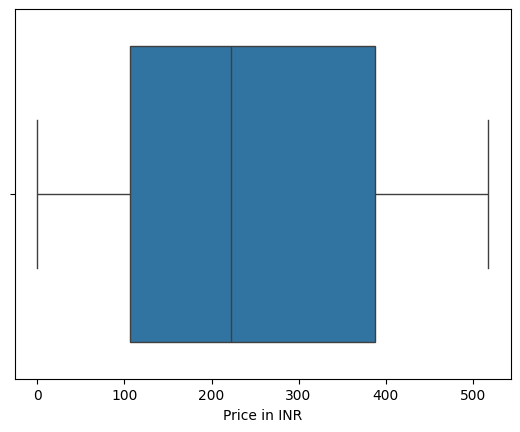

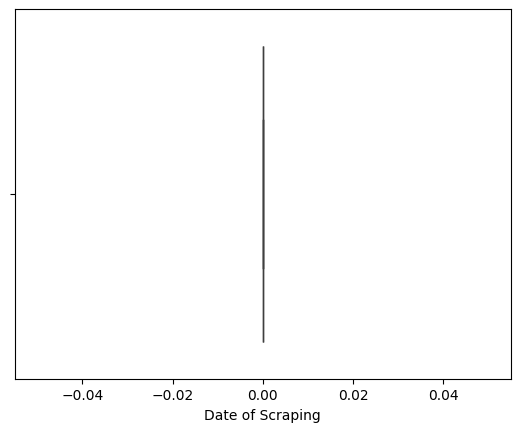

In [32]:
outliers=df.select_dtypes(include=["object","int","float"]).columns
for d in outliers:
    sns.boxplot(data=df,x=d)
    plt.show()

In [33]:
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

* ### Dividing the dataset into x and y (independent, and targeted)

In [34]:
x=df.drop(["Price in INR"],axis=1)
y=(df["Price in INR"])

In [35]:
x

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,746,4.2,427,16,14,171,26,78.0,187,0
1,789,4.2,642,25,20,118,32,78.0,173,0
2,748,4.3,186,25,20,172,26,78.0,106,0
3,750,4.2,309,25,20,137,26,78.0,193,0
4,747,4.3,186,25,20,172,26,78.0,106,0
...,...,...,...,...,...,...,...,...,...,...
1831,262,4.3,335,25,20,87,12,78.0,144,0
1832,261,4.3,335,25,20,87,12,78.0,144,0
1833,260,4.3,335,25,20,87,12,78.0,144,0
1834,301,4.2,615,36,5,95,10,64.0,149,0


In [36]:
y

0       407
1        45
2       441
3       459
4       441
       ... 
1831    106
1832    106
1833    106
1834    182
1835     23
Name: Price in INR, Length: 1767, dtype: int32

# Feature Engineering
* Using feature engineering to check for less important columns

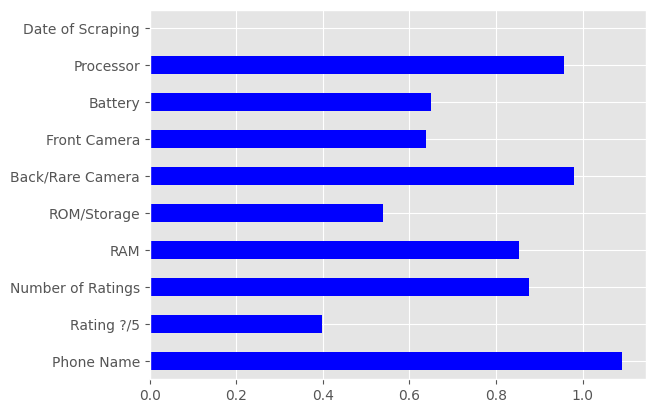

In [37]:
plt.style.use("ggplot")
important=mutual_info_regression(x,y)
feature_impo=pd.Series(important,x.columns[0:len(x.columns)])
feature_impo.plot(kind="barh",color="blue")
plt.show()

* ### Dropping less important Column

In [38]:
x.drop(["Date of Scraping"],axis=1,inplace=True)
x.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor'],
      dtype='object')

* ### Spliting the dataset

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

* #### Building a pipeline

In [40]:
Models_in_pipe={
    "Linear Regression Model ":Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())]),
    "Decision Tree Regression":Pipeline([("scaler",StandardScaler()),("Regression",DecisionTreeRegressor())]),
    "MLP Regressor Model     ":Pipeline([("Scaler",StandardScaler()),("Regression",MLPRegressor())]),
    "RandomForestRegressor_Model":Pipeline([('Scaler',StandardScaler()),('Regression',RandomForestRegressor())])
}

* #### Fitting in the train dataset with models in a pipeline

In [41]:
models=Models_in_pipe
for name,Pipeline in models.items():
    fitting=Pipeline.fit(xtrain,ytrain)
    print(name,"Fitting in progress...","\n",name,"fitted successfully","\n")

Linear Regression Model  Fitting in progress... 
 Linear Regression Model  fitted successfully 

Decision Tree Regression Fitting in progress... 
 Decision Tree Regression fitted successfully 

MLP Regressor Model      Fitting in progress... 
 MLP Regressor Model      fitted successfully 

RandomForestRegressor_Model Fitting in progress... 
 RandomForestRegressor_Model fitted successfully 



* #### Checking for accuracy of each models

In [43]:
for name, Pipeline in models.items():
    accuracy=Pipeline.score(xtest,ytest)
    print(name,"accuracy is :",accuracy)
    print(name,"perfamance, R-Squared:","--------------",r2_score(ytest,Pipeline.predict(xtest)))

Linear Regression Model  accuracy is : 0.06800634633925207
Linear Regression Model  perfamance, R-Squared: -------------- 0.06800634633925207
Decision Tree Regression accuracy is : 0.6401632580055632
Decision Tree Regression perfamance, R-Squared: -------------- 0.6401632580055632
MLP Regressor Model      accuracy is : 0.15167091561906476
MLP Regressor Model      perfamance, R-Squared: -------------- 0.15167091561906476
RandomForestRegressor_Model accuracy is : 0.7492471796616567
RandomForestRegressor_Model perfamance, R-Squared: -------------- 0.7492471796616567


- ### prediction of the models 

In [ ]:
for name,Pipeline in models.items():
    prediction=Pipeline.predict(xtest)
    print("prediction of",name,"\n",prediction,"\n")

prediction of Linear Regression Model  
 [292.03101189 284.05252503 194.77986542 214.14285916 183.313454
 279.08988482 269.82638163 279.59586606 224.12891331 229.88491184
 215.09228472 274.43062665 295.2560264  248.95370292 250.17632254
 289.12185005 251.42667817 260.31370179 223.50160627 249.85603298
 207.15952634 211.33732797 208.04865338 197.75587026 206.38087699
 235.71143632 299.80424631 240.75194275 305.43277513 272.4456375
 297.04977614 210.11801138 258.83803168 239.33758639 270.89238524
 286.30946773 257.61943267 345.80253308 219.12782245 218.27296861
 250.11308102 314.4982063  246.88802501 228.87895876 233.45441174
 245.74249173 222.07632672 282.57569407 275.65720635 285.08920809
 192.13923399 205.28498249 237.44795011 190.31377006 252.60016667
 235.66144245 262.74553183 271.26542893 223.601594   336.34714965
 336.6485802  185.98697845 235.88232018 382.27140323 210.32606569
 210.37605955 225.67155376 206.03624768 315.95451329 255.70384166
 185.52091233 273.02175404 251.9801994